## Import Libraries

In [1]:
# data analysis and wrangling
import pandas as pd
import numpy as np
import random as rnd

# visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# machine learning
from sklearn.model_selection import GridSearchCV, cross_val_score, StratifiedKFold, learning_curve
from sklearn.metrics import accuracy_score, log_loss
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, ExtraTreesClassifier, VotingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression

import warnings
warnings.filterwarnings("ignore")

## Load data

In [4]:
df = pd.read_csv("../input/titanic/train.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


- Cabin > Age > Embarked features contain a number 
of null values in that order.
- Seven features are integer or floats.

## What is the distribution of numerical feature values across the samples?

In [6]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


- Total samples are 891 or 40% of the actual number of passengers on board the Titanic (2,224).
- Survived is a categorical feature with 0 or 1 values.
- Around 38% samples survived representative of the actual survival rate at 32%.
- Most passengers (> 75%) did not travel with parents or children.
- Nearly 30% of the passengers had siblings and/or spouse aboard.
- Fares varied significantly with few passengers (<1%) paying as high as $512.
- Few elderly passengers (<1%) within age range 65-80.

## What is the distribution of categorical features


In [7]:
df.describe(include = "object")

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Braund, Mr. Owen Harris",male,347082,B96 B98,S
freq,1,577,7,4,644


- Names are unique across the dataset (count=unique=891)
- Sex variable as two possible values with 65% male (top=male, freq=577/count=891).
- Cabin values have several dupicates across samples. Alternatively several passengers shared a cabin.
- Embarked takes three possible values. S port used by most passengers (top=S)
- Ticket feature has high ratio (22%) of duplicate values (unique=681).

## Assumtions based on data analysis
We arrive at following assumptions based on data analysis done so far. We may validate these assumptions further before taking appropriate actions.

## Correlating.

We want to know how well does each feature correlate with Survival. We want to do this early in our project and match these quick correlations with modelled correlations later in the project.

## Completing.

- We may want to complete Age feature as it is definitely correlated to survival.
- We may want to complete the Embarked feature as - it may also correlate with survival or another important feature.

## Correcting.

- Ticket feature may be dropped from our analysis as it contains high ratio of duplicates (22%) and there may not be a correlation between Ticket and survival.
- Cabin feature may be dropped as it is highly incomplete or contains many null values both in training and test dataset.
- PassengerId may be dropped from training dataset as it does not contribute to survival.
- Name feature is relatively non-standard, may not contribute directly to survival, so maybe dropped.

## Creating.

- We may want to create a new feature called Family based on Parch and SibSp to get total count of family members on board.
- We may want to engineer the Name feature to -extract Title as a new feature.
- We may want to create new feature for Age bands. This turns a continous numerical feature into an ordinal categorical feature.
- We may also want to create a Fare range feature if it helps our analysis.

## Classifying.

We may also add to our assumptions based on the problem description noted earlier.

- Women (Sex=female) were more likely to have survived.
- Children (Age<?) were more likely to have survived.
- The upper-class passengers (Pclass=1) were more likely to have survived.

## Analyze by pivoting features
To confirm some of our observations and assumptions, we can quickly analyze our feature correlations by pivoting features against each other. We can only do so at this stage for features which do not have any empty values. It also makes sense doing so only for features which are categorical (Sex), ordinal (Pclass) or discrete (SibSp, Parch) type.

In [8]:
(
    df[['Pclass', 'Survived']]
    .groupby(['Pclass'], as_index=False).agg(["count","sum", "mean"])
)

Survived               
          count  sum      mean
Pclass                        
1           216  136  0.629630
2           184   87  0.472826
3           491  119  0.242363

In [9]:
(
    df[['Pclass', 'Survived']]
    .groupby(['Pclass'], as_index=False)
    .agg(["count","sum", "mean"])
#     .sort_values(by='count', ascending=False)
)

Survived               
          count  sum      mean
Pclass                        
1           216  136  0.629630
2           184   87  0.472826
3           491  119  0.242363

In [10]:
(
    df[['Sex', 'Survived']]
    .groupby(['Sex'], as_index=False)
    .agg(["count","sum", "mean"])
)

Survived               
          count  sum      mean
Sex                           
female      314  233  0.742038
male        577  109  0.188908

In [11]:
(
    df[['SibSp', 'Survived']]
    .groupby(['SibSp'], as_index=False)
    .agg(["count","sum", "mean"])
)

Survived               
         count  sum      mean
SibSp                        
0          608  210  0.345395
1          209  112  0.535885
2           28   13  0.464286
3           16    4  0.250000
4           18    3  0.166667
5            5    0  0.000000
8            7    0  0.000000

In [12]:
(
    df[['Parch', 'Survived']]
    .groupby(['Parch'], as_index=False)
    .agg(["count","sum", "mean"])
)

Survived               
         count  sum      mean
Parch                        
0          678  233  0.343658
1          118   65  0.550847
2           80   40  0.500000
3            5    3  0.600000
4            4    0  0.000000
5            5    1  0.200000
6            1    0  0.000000

- **Pclass:** We observe significant correlation (>0.5) among Pclass=1 and Survived (classifying #3). We decide to include this feature in our model.
- **Sex:** We confirm the observation during problem definition that Sex=female had very high survival rate at 74% (classifying #1).
- **SibSp and Parch:** These features have zero correlation for certain values. It may be best to derive a feature or a set of features from these individual features (creating #1).

## Analyze by visualizing data
Now we can continue confirming some of our assumptions using visualizations for analyzing the data.

## Correlating numerical features
Let us start by understanding correlations between numerical features and our solution goal (Survived).

A histogram chart is useful for analyzing continous numerical variables like Age where banding or ranges will help identify useful patterns. The histogram can indicate distribution of samples using automatically defined bins or equally ranged bands. This helps us answer questions relating to specific bands (Did infants have better survival rate?)

Note that x-axis in historgram visualizations represents the count of samples or passengers.

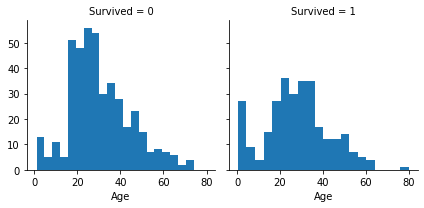

In [13]:
g = sns.FacetGrid(df, col='Survived')
g.map(plt.hist, 'Age', bins=20);

## Observations.

- Infants (Age <=4) had high survival rate.
- Oldest passengers (Age = 80) survived.
- Large number of 15-25 year olds did not survive.
- Most passengers are in 15-35 age range.

## Decisions.

This simple analysis confirms our assumptions as decisions for subsequent workflow stages.

- We should consider Age (our assumption classifying #2) in our model training.
- Complete the Age feature for null values (completing #1).
- We should band age groups (creating #3).

## Correlating numerical and ordinal features
We can combine multiple features for identifying correlations using a single plot. This can be done with numerical and categorical features which have numeric values.

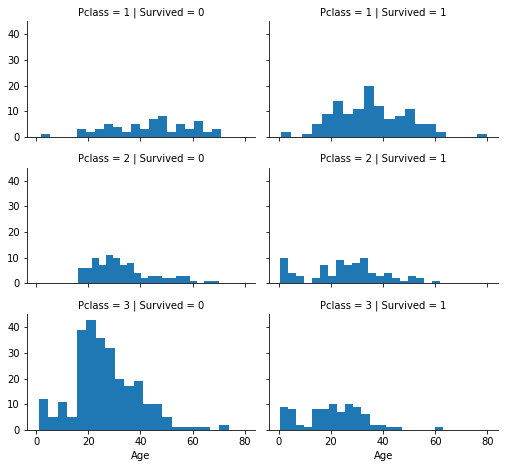

In [14]:
# grid = sns.FacetGrid(df, col='Pclass', hue='Survived')
grid = sns.FacetGrid(df, col='Survived', row='Pclass', height=2.2, aspect=1.6)
grid.map(plt.hist, 'Age', bins=20)
grid.add_legend();

## Observations.

- Pclass=3 had most passengers, however most did not survive. Confirms our classifying assumption #2.
- Infant passengers in Pclass=2 and Pclass=3 mostly survived. Further qualifies our classifying assumption #2.
- Most passengers in Pclass=1 survived. Confirms our classifying assumption #3.
- Pclass varies in terms of Age distribution of passengers.

## Decisions.

- Consider Pclass for model training.

## Correlating categorical features
Now we can correlate categorical features with our solution goal.

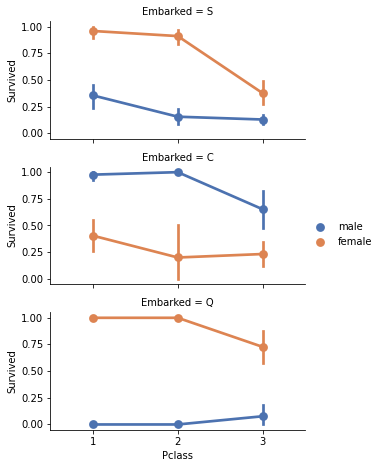

In [15]:
# grid = sns.FacetGrid(df, col='Embarked')
grid = sns.FacetGrid(df, row='Embarked', height=2.2, aspect=2)
grid.map(sns.pointplot, 'Pclass', 'Survived', 'Sex', palette='deep')
grid.add_legend()

## Observations.

- Female passengers had much better survival rate than males. Confirms classifying (#1).
- Exception in Embarked=C where males had higher survival rate. This could be a correlation between Pclass and Embarked and in turn Pclass and Survived, not necessarily direct correlation between Embarked and Survived.
- Males had better survival rate in Pclass=3 when compared with Pclass=2 for C and Q ports. Completing (#2).
- Ports of embarkation have varying survival rates for Pclass=3 and among male passengers. Correlating (#1).

## Decisions.

- Add Sex feature to model training.
- Complete and add Embarked feature to model training.

## Correlating categorical and numerical features
We may also want to correlate categorical features (with non-numeric values) and numeric features. We can consider correlating Embarked (Categorical non-numeric), Sex (Categorical non-numeric), Fare (Numeric continuous), with Survived (Categorical numeric).

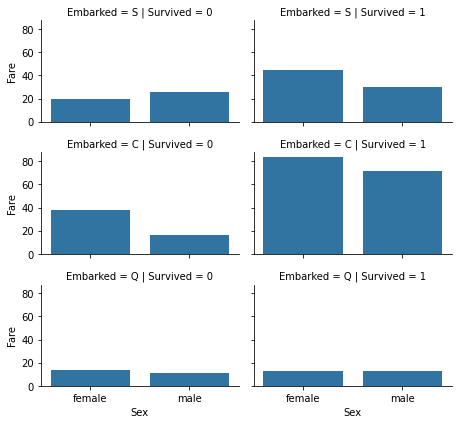

In [16]:
# grid = sns.FacetGrid(df, col='Embarked', hue='Survived', palette={0: 'k', 1: 'w'})
grid = sns.FacetGrid(df, row='Embarked', col='Survived', height=2, aspect=1.6)
grid.map(sns.barplot, 'Sex', 'Fare', ci=None)
grid.add_legend()

## Observations.

- Higher fare paying passengers had better survival. Confirms our assumption for creating (#4) fare ranges.
- Port of embarkation correlates with survival rates. Confirms correlating (#1) and completing (#2).

## Decisions.
- Consider banding Fare feature.

## Wrangle data
- Based on our assumptions and decisions we want to drop the Cabin (correcting #2) and Ticket (correcting #1) features.

In [17]:
# Create age band of 5
df['AgeBand'] = pd.cut(df['Age'], 5)
df[['AgeBand', 'Survived']].groupby(['AgeBand'], as_index=False).mean().sort_values(by='AgeBand', ascending=True)

,AgeBand,Survived
0,"(0.34, 16.336]",0.550000
1,"(16.336, 32.252]",0.369942
2,"(32.252, 48.168]",0.404255
3,"(48.168, 64.084]",0.434783
4,"(64.084, 80.0]",0.090909


In [18]:
# Create Fage band of 4
df['FareBand'] = pd.qcut(df['Fare'], 4)
df[['FareBand', 'Survived']].groupby(['FareBand'], as_index=False).mean().sort_values(by='FareBand', ascending=True)

,FareBand,Survived
0,"(-0.001, 7.91]",0.197309
1,"(7.91, 14.454]",0.303571
2,"(14.454, 31.0]",0.454955
3,"(31.0, 512.329]",0.581081


In [19]:
df['FamilySize'] = df['SibSp'] + df['Parch'] + 1 

In [20]:
df['FamilySize'].value_counts()

1     537
2     161
3     102
4      29
6      22
5      15
7      12
11      7
8       6
Name: FamilySize, dtype: int64

In [21]:
## Create a wrangle fuction
def wrangle(filepath):
    import pandas as pd
    df = pd.read_csv(filepath)

    ## Create a list of columns to drop
    to_drop = ["Ticket", "Cabin"]
    
    # Convert the sex to ordinal
    df['Sex'] = df['Sex'].map( {'female': 1, 'male': 0} ).astype(int)
    
    ## Extract titles
    df['Title'] = df.Name.str.extract(' ([A-Za-z]+)\.', expand=False)
    
    ## Replace many titles with a more common name or classify them as Rare.
    df['Title'] = df['Title'].replace(['Lady', 'Countess','Capt', 'Col','Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')
    df['Title'] = df['Title'].replace('Mlle', 'Miss')
    df['Title'] = df['Title'].replace('Ms', 'Miss')
    df['Title'] = df['Title'].replace('Mme', 'Mrs')
    
    ## Convert the titles to ordinal
    title_dict = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Rare": 5}
    df['Title'] = df['Title'].map(title_dict)
    df['Title'] = df['Title'].fillna(0)
    # Append to_drop. leave PassengerId so that it's present in the test_df
    to_drop = to_drop + ['Name']
    
    ## preparing an empty array to contain guessed Age values based on Pclass x Gender combinations
    guess_ages = np.zeros((2,3))
    # Iterate over Sex (0 or 1) and Pclass (1, 2, 3) to calculate guessed values of Age for the six combinations
    for i in range(0, 2):
        for j in range(0, 3):
            guess_df = df[(df['Sex'] == i) & (df['Pclass'] == j+1)]['Age'].dropna()
            age_guess = guess_df.median()
            # Convert random age float to nearest .5 age
            guess_ages[i,j] = int( age_guess/0.5 + 0.5 ) * 0.5     
    for i in range(0, 2):
        for j in range(0, 3):
            df.loc[ (df.Age.isnull()) & (df.Sex == i) & (df.Pclass == j+1),'Age'] = guess_ages[i,j]
    df['Age'] = df['Age'].astype(int)
    
    ## Replace Age with ordinals based on the bands above
    df.loc[ df['Age'] <= 16, 'Age'] = 0
    df.loc[(df['Age'] > 16) & (df['Age'] <= 32), 'Age'] = 1
    df.loc[(df['Age'] > 32) & (df['Age'] <= 48), 'Age'] = 2
    df.loc[(df['Age'] > 48) & (df['Age'] <= 64), 'Age'] = 3
    df.loc[df['Age'] > 64, 'Age']
    
    ## Create a new feature 'FamilySize' which combines Parch and SibSp and drop Parch and SibSp.
    df['FamilySize'] = df['SibSp'] + df['Parch'] + 1 # 1 stands for the passenger itself
    # Replace FamilySize with ordinals based on the bands above
    df.loc[ df['FamilySize'] <= 3, 'FamilySize'] = 2
    df.loc[(df['FamilySize'] > 3) & (df['FamilySize'] <= 6), 'FamilySize'] = 1
    df.loc[(df['FamilySize'] > 6), 'FamilySize'] = 0
    # Update to drop
    to_drop = to_drop + ["Parch", "SibSp"]
    
    # Create an artificial feature combining Pclass and Age
    df['Age*Class'] = df.Age * df.Pclass
    
    # Fill Embacked with the most common occurance.
    mode_val = df['Embarked'].dropna().mode()[0]
    df['Embarked'] = df['Embarked'].fillna(mode_val)
    # Convert the Embarked fill to numerical
    df['Embarked'] = df['Embarked'].map( {'S': 0, 'C': 1, 'Q': 2} ).astype(int)
    
    # Fill these with the most common occurance.
    median_val = df['Fare'].dropna().median()
    df['Fare'] = df['Fare'].fillna(median_val)
    # Convert the Fare feature to ordinal values based on the FareBand
    df.loc[ df['Fare'] <= 7.91, 'Fare'] = 0
    df.loc[(df['Fare'] > 7.91) & (df['Fare'] <= 14.454), 'Fare'] = 1
    df.loc[(df['Fare'] > 14.454) & (df['Fare'] <= 31), 'Fare']   = 2
    df.loc[ df['Fare'] > 31, 'Fare'] = 3
    df['Fare'] = df['Fare'].astype(int)
    
    # drop columns
    df.drop(columns = to_drop, inplace = True)
    
    return df

In [22]:
train_df = wrangle("../input/titanic/train.csv")
print(train_df.shape)
train_df.head()

(891, 10)


,PassengerId,Survived,Pclass,Sex,Age,Fare,Embarked,Title,FamilySize,Age*Class
0,1,0,3,0,1,0,0,1,2,3
1,2,1,1,1,2,3,1,3,2,2
2,3,1,3,1,1,1,0,2,2,3
3,4,1,1,1,2,3,0,3,2,2
4,5,0,3,0,2,1,0,1,2,6


### Let us drop the `PassengerId` manually

In [23]:
train_df.drop(columns = "PassengerId", inplace = True)
print(train_df.shape)
train_df.head()

(891, 9)


,Survived,Pclass,Sex,Age,Fare,Embarked,Title,FamilySize,Age*Class
0,0,3,0,1,0,0,1,2,3
1,1,1,1,2,3,1,3,2,2
2,1,3,1,1,1,0,2,2,3
3,1,1,1,2,3,0,3,2,2
4,0,3,0,2,1,0,1,2,6


In [24]:
test_df = wrangle("../input/titanic/test.csv")
print(test_df.shape)
test_df.head()

(418, 9)


,PassengerId,Pclass,Sex,Age,Fare,Embarked,Title,FamilySize,Age*Class
0,892,3,0,2,0,2,1,2,6
1,893,3,1,2,0,0,3,2,6
2,894,2,0,3,1,2,1,2,6
3,895,3,0,1,1,0,1,2,3
4,896,3,1,1,1,0,3,2,3


## Classifier Comparison
good! now we have a clean dataset and ready to predict. let's find which classifier works better on this dataset.

## Model, predict and solve
Now we are ready to train a model and predict the required solution. There are 60+ predictive modelling algorithms to choose from. We must understand the type of problem and solution requirement to narrow down to a select few models which we can evaluate. Our problem is a classification and regression problem. We want to identify relationship between output (Survived or not) with other variables or features (Gender, Age, Port...). We are also perfoming a category of machine learning which is called supervised learning as we are training our model with a given dataset. With these two criteria - Supervised Learning plus Classification and Regression, we can narrow down our choice of models to a few. These include:

- Logistic Regression
- KNN or k-Nearest Neighbors
- Support Vector Machines
- Naive Bayes classifier
- Decision Tree
- Random Forrest
- Perceptron
- Artificial neural network
- RVM or Relevance Vector Machine

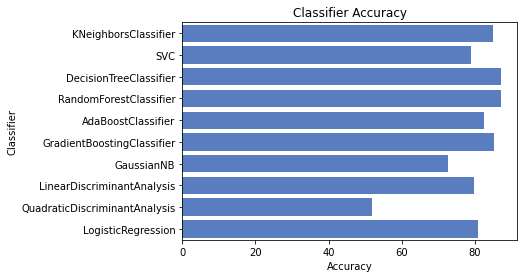

In [25]:
classifiers = [
    KNeighborsClassifier(3),
    SVC(probability=True),
    DecisionTreeClassifier(),
    RandomForestClassifier(),
    AdaBoostClassifier(),
    GradientBoostingClassifier(),
    GaussianNB(),
    LinearDiscriminantAnalysis(),
    QuadraticDiscriminantAnalysis(),
    LogisticRegression()
    ]

log_cols = ["Classifier", "Accuracy"]
log = pd.DataFrame(columns=log_cols)
acc_dict = {}

target = "Survived"
y_train = train_df["Survived"]
X_train = train_df.drop(columns = target)
X_test = test_df.drop(columns = ["PassengerId"])

for clf in classifiers:
    name = clf.__class__.__name__
    clf.fit(X_train, y_train)
    train_predictions = clf.predict(X_test)
    acc = round(clf.score(X_train, y_train) * 100, 2)
    if name in acc_dict:
        acc_dict[name] += acc
    else:
        acc_dict[name] = acc

for clf in acc_dict:
    log_entry = pd.DataFrame([[clf, acc_dict[clf]]], columns=log_cols)
    log = log.append(log_entry)

plt.xlabel('Accuracy')
plt.title('Classifier Accuracy')

sns.set_color_codes("muted")
sns.barplot(x='Accuracy', y='Classifier', data=log, color="b");

In [26]:
log.sort_values(by= "Accuracy", ascending = False).set_index("Classifier")

,Accuracy
Classifier,
DecisionTreeClassifier,87.32
RandomForestClassifier,87.32
GradientBoostingClassifier,85.30
KNeighborsClassifier,85.07
AdaBoostClassifier,82.49
LogisticRegression,81.03
LinearDiscriminantAnalysis,79.80
SVC,79.01
GaussianNB,72.62


In [27]:
# Cross validate model with Kfold stratified cross val
kfold = StratifiedKFold(n_splits=10)

In [28]:
### META MODELING  WITH ADABOOST, RF, EXTRATREES and GRADIENTBOOSTING

# Adaboost
DTC = DecisionTreeClassifier()

adaDTC = AdaBoostClassifier(DTC, random_state=42)

ada_param_grid = {"base_estimator__criterion" : ["gini", "entropy"],
              "base_estimator__splitter" :   ["best", "random"],
              "algorithm" : ["SAMME","SAMME.R"],
              "n_estimators" :[1,2],
              "learning_rate":  [0.0001, 0.001, 0.01, 0.1, 0.2, 0.3,1.5]}

gsadaDTC = GridSearchCV(adaDTC,param_grid = ada_param_grid, cv=kfold, scoring="accuracy", n_jobs= 4, verbose = 1)

gsadaDTC.fit(X_train,y_train)

ada_best = gsadaDTC.best_estimator_

gsadaDTC.best_score_

Fitting 10 folds for each of 112 candidates, totalling 1120 fits


0.8182022471910113

In [29]:
#ExtraTrees 
ExtC = ExtraTreesClassifier()


## Search grid for optimal parameters
ex_param_grid = {"max_depth": [None],
              "max_features": [1, 3, 10],
              "min_samples_split": [2, 3, 10],
              "min_samples_leaf": [1, 3, 10],
              "bootstrap": [False],
              "n_estimators" :[100,300],
              "criterion": ["gini"]}


gsExtC = GridSearchCV(ExtC,param_grid = ex_param_grid, cv=kfold, scoring="accuracy", n_jobs= 4, verbose = 1)

gsExtC.fit(X_train,y_train)

ExtC_best = gsExtC.best_estimator_

# Best score
gsExtC.best_score_

Fitting 10 folds for each of 54 candidates, totalling 540 fits


0.8316479400749064

In [30]:
# RFC Parameters tunning 
RFC = RandomForestClassifier()


## Search grid for optimal parameters
rf_param_grid = {"max_depth": [None],
              "max_features": [1, 3, 10],
              "min_samples_split": [2, 3, 10],
              "min_samples_leaf": [1, 3, 10],
              "bootstrap": [False],
              "n_estimators" :[100,300],
              "criterion": ["gini"]}


gsRFC = GridSearchCV(RFC,param_grid = rf_param_grid, cv=kfold, scoring="accuracy", n_jobs= 4, verbose = 1)

gsRFC.fit(X_train,y_train)

RFC_best = gsRFC.best_estimator_

# Best score
gsRFC.best_score_

Fitting 10 folds for each of 54 candidates, totalling 540 fits


0.8316479400749064

In [31]:
# Gradient boosting tunning

GBC = GradientBoostingClassifier()
gb_param_grid = {'loss' : ["deviance"],
              'n_estimators' : [100,200,300],
              'learning_rate': [0.1, 0.05, 0.01],
              'max_depth': [4, 8],
              'min_samples_leaf': [100,150],
              'max_features': [0.3, 0.1] 
              }

gsGBC = GridSearchCV(GBC,param_grid = gb_param_grid, cv=kfold, scoring="accuracy", n_jobs= 4, verbose = 1)

gsGBC.fit(X_train,y_train)

GBC_best = gsGBC.best_estimator_

# Best score
gsGBC.best_score_

Fitting 10 folds for each of 72 candidates, totalling 720 fits


0.8215605493133582

In [32]:
### SVC classifier
SVMC = SVC(probability=True)
svc_param_grid = {'kernel': ['rbf'], 
                  'gamma': [ 0.001, 0.01, 0.1, 1],
                  'C': [1, 10, 50, 100,200,300, 1000]}

gsSVMC = GridSearchCV(SVMC,param_grid = svc_param_grid, cv=kfold, scoring="accuracy", n_jobs= 4, verbose = 1)

gsSVMC.fit(X_train,y_train)

SVMC_best = gsSVMC.best_estimator_

# Best score
gsSVMC.best_score_

Fitting 10 folds for each of 28 candidates, totalling 280 fits


0.8294007490636703

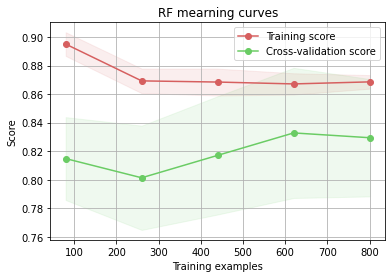

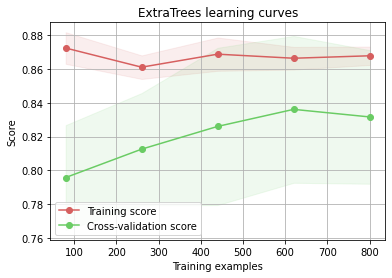

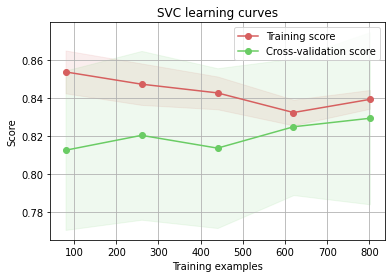

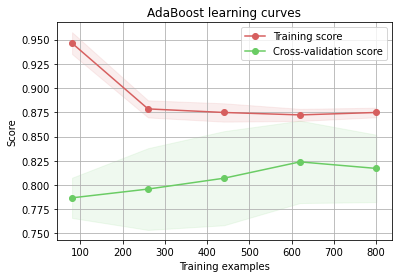

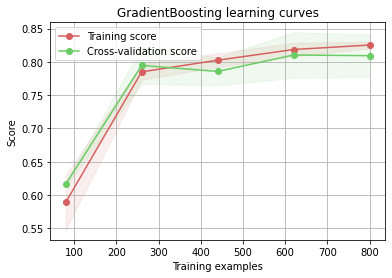

In [33]:
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=-1, train_sizes=np.linspace(.1, 1.0, 5)):
    """Generate a simple plot of the test and training learning curve"""
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt

g = plot_learning_curve(gsRFC.best_estimator_,"RF mearning curves",X_train,y_train,cv=kfold)
g = plot_learning_curve(gsExtC.best_estimator_,"ExtraTrees learning curves",X_train,y_train,cv=kfold)
g = plot_learning_curve(gsSVMC.best_estimator_,"SVC learning curves",X_train,y_train,cv=kfold)
g = plot_learning_curve(gsadaDTC.best_estimator_,"AdaBoost learning curves",X_train,y_train,cv=kfold)
g = plot_learning_curve(gsGBC.best_estimator_,"GradientBoosting learning curves",X_train,y_train,cv=kfold)

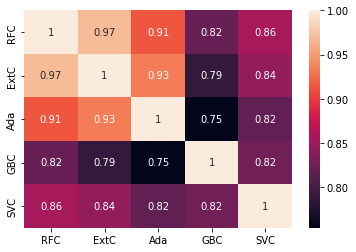

In [34]:
test_Survived_RFC = pd.Series(RFC_best.predict(X_test), name="RFC")
test_Survived_ExtC = pd.Series(ExtC_best.predict(X_test), name="ExtC")
test_Survived_SVMC = pd.Series(SVMC_best.predict(X_test), name="SVC")
test_Survived_AdaC = pd.Series(ada_best.predict(X_test), name="Ada")
test_Survived_GBC = pd.Series(GBC_best.predict(X_test), name="GBC")

# Concatenate all classifier results
ensemble_results = pd.concat([test_Survived_RFC,test_Survived_ExtC,test_Survived_AdaC,test_Survived_GBC, test_Survived_SVMC],axis=1)
g= sns.heatmap(ensemble_results.corr(),annot=True)

##  Prediction
### Now we can use Random Forest Classifier to predict our data.

In [35]:
votingC1 = VotingClassifier(estimators=[('rfc', RFC_best), ('extc', ExtC_best),
('svc', SVMC_best), ('adac',ada_best),('gbc',GBC_best)], voting='hard', n_jobs=4)

votingC1 = votingC1.fit(X_train, y_train)

In [36]:
votingC2 = VotingClassifier(estimators=[('rfc', RFC_best), ('extc', ExtC_best),
('svc', SVMC_best), ('adac',ada_best)], voting='soft', n_jobs=4)

votingC2 = votingC2.fit(X_train, y_train)

In [37]:
votingC3 = VotingClassifier(estimators=[('rfc', RFC_best), ('svc', SVMC_best)], voting='soft', n_jobs=4)

votingC3 = votingC3.fit(X_train, y_train)

In [38]:
votingC4 = VotingClassifier(estimators=[('extc', ExtC_best), ('adac',ada_best)], voting='soft', n_jobs=4)

votingC4 = votingC4.fit(X_train, y_train)

In [39]:
pred1 = votingC1.predict(X_train)
pred2 = votingC2.predict(X_train)
pred3 = votingC3.predict(X_train)
pred4 = votingC4.predict(X_train)
print(f"acc1: {round(accuracy_score(y_train, pred1), 7)}")
print(f"acc2: {round(accuracy_score(y_train, pred2), 7)}")
print(f"acc3: {round(accuracy_score(y_train, pred3), 7)}")
print(f"acc4: {round(accuracy_score(y_train, pred4), 7)}")

acc1: 0.8664422
acc2: 0.8686869
acc3: 0.8552189
acc4: 0.8731762


In [40]:
test_Survived = pd.Series(votingC4.predict(X_test), name="Survived")

results = pd.concat([test_df.PassengerId,test_Survived],axis=1)

results.to_csv("ensemble_python_voting.csv",index=False)